<a href="https://colab.research.google.com/github/tarabelo/PIAC-2526/blob/main/Problemas_QUBO_y_modelo_Ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a los Problemas de Optimización

Muchos problemas relevantes en ciencia, ingeniería, economía o inteligencia artificial pueden expresarse como **problemas de optimización**. En términos generales, un problema de optimización consiste en encontrar los valores de ciertas variables que **minimizan** o **maximizan** una **función objetivo**, respetando una serie de **restricciones**.

Formalmente, un problema de optimización puede escribirse como:

$$
\begin{aligned}
\text{Minimizar (o maximizar)} \quad & f(x_1, x_2, \dots, x_n) \\
\text{sujeto a} \quad & g_i(x_1, \dots, x_n) \leq 0, \quad i = 1, \dots, m \\
& h_j(x_1, \dots, x_n) = 0, \quad j = 1, \dots, p
\end{aligned}
$$

donde:
- $f$ es la función objetivo,
- $g_i$ son restricciones de desigualdad,
- $h_j$ son restricciones de igualdad,
- y las variables $x_k$ pueden ser reales, enteras, binarias o discretas.

## Ejemplos clásicos de problemas de optimización

- **Problema del viajante (TSP)**: Dado un conjunto de ciudades y las distancias entre ellas, encontrar el camino más corto que visite cada ciudad exactamente una vez y regrese al punto de origen.

- **Problema de la mochila (Knapsack)**: Dados objetos con un peso y un valor, seleccionar un subconjunto cuyo peso total no exceda una capacidad dada y cuyo valor total sea máximo.

- **Coloración de grafos**: Asignar colores a los nodos de un grafo de forma que nodos adyacentes no compartan color y se minimice el número total de colores utilizados.

- **Problema de satisfacibilidad booleana (SAT)**: Determinar si existe una asignación de valores booleanos a un conjunto de variables que satisfaga una fórmula lógica.

- **Programación lineal binaria/entera**: Optimizar una función lineal sujeta a restricciones lineales, donde las variables sólo pueden tomar valores/enteros.

Muchos de estos problemas son [**NP-duros**](https://es.wikipedia.org/wiki/NP-hard), es decir, su complejidad crece exponencialmente con el tamaño del problema.


<details>
<summary>Resumen sobre las clases de complejidad computacional</summary>

Cuando hablamos de la **complejidad computacional** de un problema, nos referimos a la cantidad de recursos (tiempo y/o espacio) necesarios para resolverlo en función del tamaño de la entrada. Esto se formaliza mediante **clases de complejidad**, que agrupan problemas según los recursos requeridos por sus algoritmos.

## Clases principales

### 🔹 P (Polynomial Time)
- Conjunto de problemas que pueden resolverse en **tiempo polinómico** por una máquina determinista.
- Es decir, existen algoritmos eficientes que resuelven el problema con un coste $O(n^k)$, para alguna constante $k$.
- **Ejemplo**: ordenamiento de una lista, búsqueda en un grafo no ponderado.

### 🔹 NP (Nondeterministic Polynomial Time)
- Problemas cuya solución puede **verificarse** en tiempo polinómico, aunque no sepamos cómo **encontrarla** eficientemente.
- Incluye todos los problemas de P (es decir, $\text{P} \subseteq \text{NP}$).
- **Ejemplo**: SAT, TSP, coloreado de grafos, problema de la mochila.

### 🔹 NP-completo
- Subconjunto de NP que incluye los problemas **más difíciles** de la clase.
- Un problema es NP-completo si:
  1. Pertenece a NP.
  2. Todo problema en NP puede reducirse a él en tiempo polinómico.
- Si se resuelve uno en tiempo polinómico, **todos los problemas de NP también se pueden resolver eficientemente**.
- **Ejemplo**: SAT (el primer problema demostrado como NP-completo), 3-COLOR, TSP en su versión de decisión (determinar si existe un camino menor o igual que un valor dado).

### 🔹 NP-duro (NP-hard)
- Problemas **al menos tan difíciles** como los NP-completos, pero **no necesariamente pertenecen a NP** (por ejemplo, pueden no tener soluciones verificables en tiempo polinómico).
- Suelen ser problemas de optimización o de decisión más generales.
- **Ejemplo**: versión de optimización del TSP (encontrar el camino más corto), QUBO, etc.

## ¿P = NP?

La pregunta de si $\text{P} = \text{NP}$ es uno de los problemas abiertos más importantes de la informática teórica. Si se demuestra que $\text{P} = \text{NP}$, todos los problemas cuya solución se puede verificar eficientemente también podrían **resolverse** eficientemente, lo que tendría enormes implicaciones en criptografía, planificación, diseño automático, etc.

---

## Clases de complejidad cuántica

### 🔹 BQP (Bounded-error Quantum Polynomial Time)
- Problemas que pueden resolverse en **tiempo polinómico por una computadora cuántica** con un error de probabilidad acotado (< 1/3).
- Es la **contraparte cuántica de P**, e incluye algunos problemas que no se sabe cómo resolver eficientemente con algoritmos clásicos.
- **Ejemplo**: factorización de enteros (algoritmo de Shor), logaritmo discreto, simulación de sistemas cuánticos.

$$
\text{P} \subseteq \text{BPP} \subseteq \text{BQP}
$$

Donde **BPP** (Bounded-error Probabilistic Polynomial time) representa problemas que pueden resolverse eficientemente con algoritmos probabilísticos clásicos.

### 🔹 QMA (Quantum Merlin-Arthur)
- Contraparte cuántica de **NP**: problemas para los que un verificador cuántico puede comprobar una prueba cuántica en tiempo polinómico.
- Existen problemas QMA-completos, como ciertas versiones del **problema del Hamiltoniano local**.

---

## Relaciones generales entre clases (parcialmente conocidas)

- Se sabe que:

$$
\text{P} \subseteq \text{NP}, \quad \text{P} \subseteq \text{BQP}
$$

- Pero **no se conoce** si:

$$
\text{NP} \subseteq \text{BQP} \quad \text{o si} \quad \text{BQP} \subseteq \text{NP}
$$

---

## Relevancia para la computación cuántica

Problemas como **QUBO** o el **modelo de Ising** pertenecen a la clase **NP-hard** y, en general, **no se espera** que puedan resolverse eficientemente en computadoras clásicas. Sin embargo, ciertos algoritmos cuánticos como el **Quantum Annealing** (usado en D-Wave) o el **QAOA (Quantum Approximate Optimization Algorithm)** ofrecen aproximaciones prometedoras, que caen dentro (o cerca) de la clase BQP o heurísticas asociadas.

---




</details>

En lo que sigue, nos centraremos en el problema **QUBO**, una formulación central para representar problemas de optimización combinatoria, tanto en su versión clásica como en su versión cuántica.


<a name="qubo"></a>
# **Problemas de optimización binaria cuadrática sin restricciones (QUBO)**

Un tipo de problemas en los que se está usando la computación cuántica son los denominados [QUBO](https://en.wikipedia.org/wiki/Quadratic_unconstrained_binary_optimization) (_Quadratic Unconstrained Binary Optimization_).

Este tipo de problemas consisten en minimizar una función $f_Q(x)$ con la siguiente forma:

$$
f_Q(x) = x^TQx = \sum_{i=0}^{n-1}\sum_{j=0}^i q_{ij}x_ix_j
$$

donde $Q \in \mathbb{R}^{n\times n}$ es una matriz triangular (o simétrica) y $x$ un vector de componentes binarias ($x_i \in \{0,1\}$).

Los problemas QUBO son [NP-duros](https://es.wikipedia.org/wiki/NP-hard).

Muchos modelos de optimización combinatoria pueden expresarse como problemas QUBO, por ejemplo modelos de programación lineal o problemas como el coloreado de grafos o el problema del viajante.

### Ejemplo: algoritmo MAX-CUT

Sea $G = (V, E)$ un grafo pesado no dirigido con $n$-nodos y pesos $w_{ij}>0$, $w_{ij}=w_{ji}$, con $(j,k)\in E$ y $w_{ij}=0$ si $(j,k)\notin E$.

Objetivo: dividir el grafo en dos conjuntos tal que la suma de los pesos de las aristas entre ambos conjuntos sea máximo.


<center><img src="https://drive.google.com/uc?export=view&id=1a3laJp6AMIys0DLT9d1QqGyFZPjJ17D9" alt="Ejemplo MAX-CUT" width="700"  /></center>

El algoritmo procede asignando a cada vértice un valor $x_i = \{0,1\}$ de forma que el grafo queda dividido en dos conjuntos: los vértices con $x_i = 0$ y aquellos con $x_i = 1$.

El algoritmo MAX-CUT busca el número binario $\textbf{x}=x_1\cdots x_n$ que maximice la función de coste:

$$
C(\textbf{x}) = \sum_{i,j = 0}^{n-1} w_{ij} x_i (1-x_j)
$$

Si los vértices $i$ y $j$ están en el mismo conjunto: $x_i = x_j \Rightarrow x_i (1-x_j) = 0$.

Si los vértices $i$ y $j$ están en diferentes conjunto: $x_i \ne x_j \Rightarrow x_i (1-x_j) = 1$ ó $x_j (1-x_i) = 1$.

Así, $C(\textbf{x})$ es la suma de los pesos de las aristas que separan ambos conjuntos.

#### MAXCUT como problema QUBO
Los valores $w_{ij}$ son $\ne 0$ solo para las aristas del grafo.

Para una arista $(i,j)\in E$, los términos en $C(x)$ son:

$$
x_i(1-x_j) + x_j(1-x_i) = x_i+x_j-2x_ix_j
$$

Por tanto, podemos escribir la función de coste como:

$$
C(x) = \sum_{(i,j) \in E} w_{ij} (x_i + x_j - 2 x_i x_j)
$$

Para expresarlo como un **problema QUBO**, que requiere una **minimización**, usamos el negativo:

$$
f(x) = -\sum_{(i,j) \in E} w_{ij} (x_i + x_j - 2 x_i x_j)
$$

---

#### Matriz $Q$ del QUBO

Reorganizamos la expresión en forma cuadrática:

$$
f(x) = x^T Q x
$$

Donde $Q \in \mathbb{R}^{n \times n}$ es una matriz simétrica definida como:

$$
q_{ij} =
\begin{cases}
- \sum_{k \ne i} w_{ik} & \text{si } i = j \\
2 w_{ij} & \text{si } (i,j) \in E \text{ y } i \gt j \\
0 & \text{si } (i,j) \notin E
\end{cases}
$$

---

## 🧪 Ejemplo: grafo de 3 nodos con pesos

Sea el grafo con nodos $\{0, 1, 2\}$ y aristas:

- $(0,1)$ con peso 1  
- $(1,2)$ con peso 2  
- $(0,2)$ con peso 3

El valor del corte se expresa como:

$$
\text{MAXCUT}(x) = 1(x_0 + x_1 - 2 x_0 x_1) + 2(x_1 + x_2 - 2 x_1 x_2) + 3(x_0 + x_2 - 2 x_0 x_2)
$$

La matriz $Q$ correspondiente es:

$$
Q = \begin{bmatrix}
-4 & 2 & 6 \\
2 & -3 & 4 \\
6 & 4 & -5
\end{bmatrix}
$$

Verificación de los términos:

- $Q_{00} = - (1 + 3) = -4$
- $Q_{11} = - (1 + 2) = -3$
- $Q_{22} = - (2 + 3) = -5$
- $Q_{01} = Q_{10} = 2 \cdot 1 = 2$
- $Q_{12} = Q_{21} = 2 \cdot 2 = 4$
- $Q_{02} = Q_{20} = 2 \cdot 3 = 6$

---

## ✅ Resultado: QUBO equivalente

El problema MAXCUT queda formulado como:

$$
\min_{x \in \{0,1\}^3} x^T Q x
$$

donde la matriz $Q$ representa la interacción entre nodos según el grafo dado.


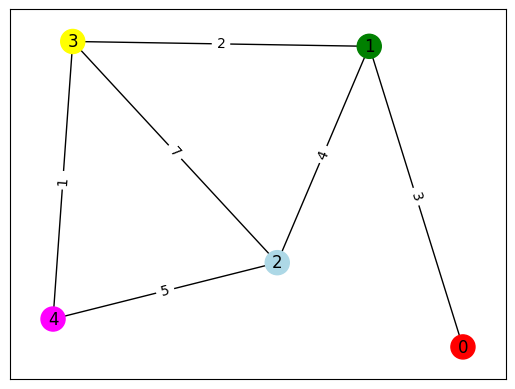

In [6]:
import numpy as np
import networkx as nx  # Librería para manejar grafos

# Ejemplo de grafo con 5 nodos
nnodes = 5
G = nx.Graph()
# Añade nodos y aristas
G.add_nodes_from(np.arange(0,nnodes,1))
edges = [(0,1,3),(1,2,4),(1,3,2),(2,4,5),(2,3,7),(3,4,1)]
G.add_weighted_edges_from(edges)

# Mostramos el grafo
layout = nx.random_layout(G,seed=10)
colors = ['red', 'green', 'lightblue', 'yellow', 'magenta']
nx.draw_networkx(G, layout, node_color=colors)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels);

In [8]:
weight_matrix = nx.adjacency_matrix(G).toarray()
print(weight_matrix)

[[0 3 0 0 0]
 [3 0 4 2 0]
 [0 4 0 7 5]
 [0 2 7 0 1]
 [0 0 5 1 0]]
